In [1]:
import pandas as pd
import numpy as np

### **그냥 외국인매수량 년도/월별 합 정규성 검정**

#### 1. 먼저 년도/월로 칼럼 생성

In [2]:
year=[]
for i in range(2005,2022):
    for j in range(1,13):
        a = format(j, '02')
        year.append(str(i)+" "+str(a))

year.append('2022 01')
year.append('2022 02')
year.append('2022 03')
year.append('2022 04')

#### 2. pre_kospi -> pre_kospi_month로 바꿔/  년도/ 월별을 나타내는  새로운 칼럼 생성

In [3]:
pre_kospi=pd.read_csv('./data/pre_kospi.csv')
pre_kospi['날짜']=pd.to_datetime(pre_kospi['날짜'])
pre_kospi

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,4,2718.89,0.0095,2022-04-19,-3431,331,3364
...,...,...,...,...,...,...,...
4276,4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [4]:
# 년도/월만 뽑아 새로운 칼럼 생성
pre_kospi_month=pre_kospi
pre_kospi_month
pre_kospi_month_foreign=pd.DataFrame(pre_kospi_month[['외국인순매수','날짜']])
pre_kospi_month['년도']=pre_kospi_month['날짜'].dt.strftime("%Y ")
pre_kospi_month['월']=pre_kospi_month['날짜'].dt.strftime("%m")
pre_kospi_month.head(2)

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수,년도,월
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825,2022,04
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975,2022,04


#### 3. 년도/월로 groupby 해서 sum

In [5]:
pre_kospi_month_sum=pre_kospi_month.groupby(['년도','월'],as_index=False).sum()
pre_kospi_month_sum

,년도,월,Unnamed: 0,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005,01,89670,18970.33,0.0415,-9523,8538,984
1,2005,02,72267,16396.13,0.0820,-5725,14654,-8928
2,2005,03,93093,21741.01,-0.0448,3820,-20741,16920
3,2005,04,84210,19108.21,-0.0567,2291,-3243,955
4,2005,05,87990,19718.57,0.0636,-18304,1048,17254
...,...,...,...,...,...,...,...,...
203,2021,12,1903,65746.87,0.0488,-63690,33524,28232
204,2022,01,1310,57311.04,-0.1095,43876,-18614,-27000
205,2022,02,837,49032.27,0.0148,4703,8065,-16258
206,2022,03,567,56673.04,0.0226,65007,-50908,-16043


#### 4. 위에서 외국인 순매수만 뽑아서

In [6]:
pre_kospi_month_sum_for=pd.DataFrame(pre_kospi_month_sum['외국인순매수'])
pre_kospi_month_sum_for
# pre_kospi_month_foreign['날짜'].dt.year

,외국인순매수
0,8538
1,14654
2,-20741
3,-3243
4,1048
...,...
203,33524
204,-18614
205,8065
206,-50908


#### 5. 위 데이터의 index를 만든 날짜로 

In [7]:
pre_kospi_month_sum_for['날짜']=year
pre_kospi_month_sum_for.set_index('날짜',inplace=True)
pre_kospi_month_sum_for

,외국인순매수
날짜,
2005 01,8538
2005 02,14654
2005 03,-20741
2005 04,-3243
2005 05,1048
...,...
2021 12,33524
2022 01,-18614
2022 02,8065


In [8]:
# pre_kospi_date=pre_kospi['날짜'].sort_values(ascending=True)
# pre_kospi_date

In [9]:
pre_kospi_for=pd.DataFrame(pre_kospi_month['외국인순매수'])
# pre_kospi_for_1=pd.DataFrame(pre_kospi_for)
# pre_kospi_for
# list=[]
# for i,j in enumerate(pre_kospi_for):
#     list.append(j)
pre_kospi_for

,외국인순매수
0,-6542
1,-1556
2,-597
3,948
4,331
...,...
4276,178
4277,-6
4278,246
4279,397


#### **월별합으로 전처리한 외국인순매수를 정규성검증** -> 안따름

In [10]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) mi

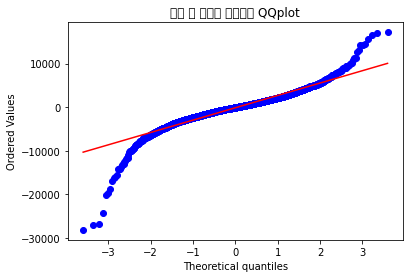

In [11]:
probplot(pre_kospi_for['외국인순매수'],plot=plt) 
plt.title('월별 합 외국인 순매수량 QQplot')
plt.show()

In [12]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(pre_kospi_for['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pre_kospi_for['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')


#--------------------> 정규성 따르지 않는다 <-----------------------------

p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


----------------

## **2016-2019 년 경기 일별 확장기만 추출해 검증**

In [35]:
pre_kospi=pd.read_csv('./data/pre_kospi.csv')
pre_kospi['날짜']=pd.to_datetime(pre_kospi['날짜'])
pre_kospi.dtypes
pre_kospi_month_2016=pre_kospi.loc[779:1512]
# pre_kospi_month=pre_kospi
pre_kospi_month_2016


#pre_kospi_month_foreign=pd.DataFrame(pre_kospi_month[['외국인순매수','날짜']])
pre_kospi_month_2016['년도']=pre_kospi_month_2016['날짜'].dt.strftime("%Y ")
pre_kospi_month_2016['월']=pre_kospi_month_2016['날짜'].dt.strftime("%m")

pre_kospi_month_sum_2016=pre_kospi_month_2016.groupby(['년도','월'],as_index=False).sum()
pre_kospi_month_sum_for_2016=pd.DataFrame(pre_kospi_month_sum_2016['외국인순매수'])
pre_kospi_month_sum_for_2016
# # pre_kospi_month_foreign['날짜'].dt.year


C:\Users\user\AppData\Local\Temp\ipykernel_4368\1720783516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_kospi_month_2016['년도']=pre_kospi_month_2016['날짜'].dt.strftime("%Y ")
C:\Users\user\AppData\Local\Temp\ipykernel_4368\1720783516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_kospi_month_2016['월']=pre_kospi_month_2016['날짜'].dt.strftime("%m")


,외국인순매수
0,34190
1,19570
2,1798
3,7893
4,39777
5,10792
6,10816
7,3986
8,-3556
9,10106


In [36]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) mis

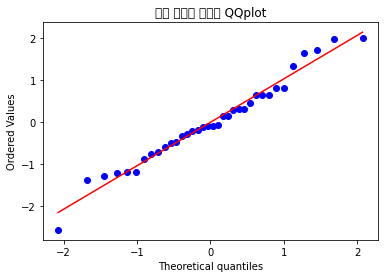

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() ###stanrdardScaler객체 생성
scaler.fit(pre_kospi_month_sum_for_2016)#iris_df로 훈련을 시킨다. fit은 데이터 변환을 위해서 기준 정보를 설정하는 역할

fore_scaled_2016=scaler.transform(pre_kospi_month_sum_for_2016)  #transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환됨. 공식을 실행시켜준다고 생각하면됨.

for_df_scaled_2016 =pd.DataFrame(data=fore_scaled_2016,columns=['외국인순매수'])#데이터 프레임화
for_df_scaled_2016
# 정규성 검정 (시각화)
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(for_df_scaled_2016['외국인순매수'],plot=plt) 
plt.title('월별 코스피 등락률 QQplot')
plt.show()

In [38]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(pre_kospi_month_sum_for_2016)

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pre_kospi_month_sum_for_2016)

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  64.40474987% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  99.28511904% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


-------

In [22]:
# df.describe()

,외국인순매수
count,207.000000
mean,-3013.685990
std,29321.571276
min,-125177.000000
25%,-19048.000000
50%,-1981.000000
75%,15053.500000
max,75554.000000


In [23]:
# # Q1=-19048.00000
# Q3=15053.500000
# IQR=Q3-Q1

In [24]:
# Q1-1.5*IQR


-70200.25

In [25]:
# Q3+1.5*IQR

66205.75

In [26]:
# mask =(pre_kospi_month_sum_for['외국인순매수']>=(-70200.25))& (pre_kospi_month_sum_for['외국인순매수']<=(66205.75))
# df_n = pre_kospi_month_sum_for.loc[mask]
# df_n

,외국인순매수
날짜,
2005 01,8538
2005 02,14654
2005 03,-20741
2005 04,-3243
2005 05,1048
...,...
2021 12,33524
2022 01,-18614
2022 02,8065
